In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

<img src="antiporter1.png" width="800" height="600" />

## System of ODEs:


$\frac{\displaystyle d[1] (t)  }{\displaystyle dt} = [6] (t) \cdot k_{\mathrm{off}}^{\mathrm{B}} + [2] (t) \cdot k_{\mathrm{off}}^{\mathrm{A}} - [1] (t) \cdot [\mathrm{A_{out}}] (t) \cdot k_{\mathrm{on}}^{\mathrm{A}} - [1] (t) \cdot [\mathrm{B_{out}}] (t) \cdot k_{\mathrm{on}}^{\mathrm{B}}$

$ \frac{\displaystyle d[2] (t)  }{\displaystyle dt} = [1] (t) \cdot [\mathrm{A_{out}}] (t) \cdot k_{\mathrm{on}}^{\mathrm{A}} + [3] (t) \cdot k_{\mathrm{conf}} - [2] (t) \cdot k_{\mathrm{conf}}- [2] (t) \cdot k_{\mathrm{off}}^{\mathrm{A}}$

$ \frac{\displaystyle d[3] (t) }{\displaystyle dt} = [2] (t) \cdot k_{\mathrm{conf}} + [4] (t) \cdot k_{\mathrm{off}}^{\mathrm{B}} - [3] (t) \cdot k_{\mathrm{conf}}- [3] (t) \cdot [\mathrm{B_{in}}] (t) \cdot k_{\mathrm{on}}^{\mathrm{B}}$

$ \frac{\displaystyle d[4] (t)  }{\displaystyle dt} = [3] (t) \cdot [\mathrm{B_{in}}] (t) \cdot k_{\mathrm{on}}^{\mathrm{B}} + [5] (t) \cdot [\mathrm{A_{in}}] (t) \cdot k_{\mathrm{on}}^{\mathrm{A}} - [4] (t) \cdot k_{\mathrm{off}}^{\mathrm{B}} - [4] (t) \cdot k_{\mathrm{off}}^{\mathrm{A}} $

$\frac{\displaystyle d[5] (t) }{\displaystyle dt} = [6] (t) \cdot k_{\mathrm{conf}} + [4] (t) \cdot k_{\mathrm{off}}^{\mathrm{A}} - [5] (t) \cdot k_{\mathrm{conf}}- [5] (t) \cdot [\mathrm{A_{in}}] (t) \cdot k_{\mathrm{on}}^{\mathrm{A}}$

$ \frac{\displaystyle d[6] (t) }{\displaystyle dt} = [1] (t) \cdot [\mathrm{B_{out}}] (t) \cdot k_{\mathrm{on}}^{\mathrm{B}} + [5] (t) \cdot k_{\mathrm{conf}} - [6] (t) \cdot k_{\mathrm{conf}}- [6] (t) \cdot k_{\mathrm{off}}^{\mathrm{B}}$


$ \frac{\displaystyle d[A_{out}] (t) }{\displaystyle dt} = [2] (t) \cdot k_{\mathrm{off}}^{\mathrm{A}} - [1] (t) \cdot [A_{out}] (t) \cdot k_{\mathrm{on}}^{\mathrm{A}} $

$ \frac{\displaystyle d[A_{in}] (t) }{\displaystyle dt} = [4] (t) \cdot k_{\mathrm{off}}^{\mathrm{A}} - [5] (t) \cdot [A_{in}] (t) \cdot k_{\mathrm{on}}^{\mathrm{A}} $

$ \frac{\displaystyle d[B_{out}] (t) }{\displaystyle dt} = [6] (t) \cdot k_{\mathrm{off}}^{\mathrm{B}} - [1] (t) \cdot [B_{out}] (t) \cdot k_{\mathrm{on}}^{\mathrm{B}} $

$ \frac{\displaystyle d[B_{in}] (t) }{\displaystyle dt} = [4] (t) \cdot k_{\mathrm{off}}^{\mathrm{B}} - [3] (t) \cdot [B_{in}] (t) \cdot k_{\mathrm{on}}^{\mathrm{B}} $

## Rate constants:
$ k_{\mathrm{on}}^{\mathrm{A}} = 16.61 \ \mathrm{s^{-1} molec^{-1}}$

$ k_{\mathrm{off}}^{\mathrm{A}} = 1\mathrm{e}6 \ \mathrm{s^{-1}}$

$ k_{\mathrm{on}}^{\mathrm{B}} = 16.61\mathrm{e-}3 \ \mathrm{s^{-1} molec^{-1}}$

$ k_{\mathrm{off}}^{\mathrm{B}} = 1\mathrm{e}4 \ \mathrm{s^{-1}}$

$ k_{\mathrm{conf}}  = 1\mathrm{e}2 \ \mathrm{s^{-1}}$


## Initial populations:

$ [1] (0) = 1$

$ [2] (0) = [3] (0) = [4] (0) = [5] (0) = [6] (0) = 0 $

$ [\mathrm{A_{out}}] (0) = 240$

$[\mathrm{A_{in}}] (0) = 0$

$[\mathrm{B_{out}}] (0) = 48$

$[\mathrm{B_{in}}] (0) = 72$



In [48]:
# Antiporter Model 1 simulation
def antiporter1(x,t):
    '''
    input x(t) populations and time
    output dxdt
    '''
    
    # state populations 
    OF = x[0]
    OF_Ab = x[1]
    IF_Ab = x[2]
    IF_Ab_Bb = x[3]
    IF_Bb = x[4]
    OF_Bb = x[5]
    

    # species populations (molec.)
    a_out = x[6]
    a_in = x[7]
    b_out = x[8]
    b_in = x[9]
# NESS
#     # species populations (molec.)
#     a_out = 240
#     a_in = 0
#     b_out = 48
#     b_in = 72
    
    # rate constants (molec.)
#     k_a_on = 16.61 # H+  
#     k_a_off = 1e6  # H+
    
    k_a_on = 2.3e-5 # Na+  
    k_a_off = 300  # Na+
    
    k_b_on = 16.61e-3 
    k_b_off = 1e4
    
    k_conf = 1
    
    # antiporter ODEs
    # OF
    d1dt = OF_Bb*k_b_off + OF_Ab*k_a_off - OF*a_out*k_a_on - OF*b_out*k_b_on
    
    # OF_Ab
    d2dt = OF*a_out*k_a_on + IF_Ab*k_conf - OF_Ab*k_conf - OF_Ab*k_a_off
    
    # IF_Ab
    d3dt = OF_Ab*k_conf + IF_Ab_Bb*k_b_off - IF_Ab*k_conf - IF_Ab*b_in*k_b_on
    
    # IF_Ab_Bb
    d4dt = IF_Ab*b_in*k_b_on + IF_Bb*a_in*k_a_on - IF_Ab_Bb*k_b_off - IF_Ab_Bb*k_a_off
    
    # IF_Bb
    d5dt = OF_Bb*k_conf + IF_Ab_Bb*k_a_off - IF_Bb*k_conf - IF_Bb*a_in*k_a_on
    
    # OF_Bb
    d6dt = OF*b_out*k_b_on + IF_Bb*k_conf - OF_Bb*k_conf - OF_Bb*k_b_off

    ## -- comment out last 4 ODES for NESS - constant pop. --
    # A_out
    d7dt = OF_Ab*k_a_off - OF*a_out*k_a_on 
    
    # A_in
    d8dt = IF_Ab_Bb*k_a_off - IF_Bb*a_in*k_a_on 
    
    # B_out
    d9dt = OF_Bb*k_b_off - OF*b_out*k_b_on 
    
    # B_in
    d10dt = IF_Ab_Bb*k_b_off - IF_Ab*b_in*k_b_on 
    
    
    return [d1dt, d2dt, d3dt, d4dt, d5dt, d6dt, d7dt, d8dt, d9dt, d10dt]
    # NESS
    # return [d1dt, d2dt, d3dt, d4dt, d5dt, d6dt]
    
# intial state populations
OF_0 = 1  # molec.
OF_Ab_0 = 0
IF_Ab_0 = 0
IF_Ab_Bb_0 = 0
IF_Bb_0 = 0
OF_Bb_0 = 0

# intial species populations
a_out_0 = 240  # molec.
a_in_0 = 0
b_out_0 = 48
b_in_0 = 72

# NESS
x_0 = [OF_0, OF_Ab_0, IF_Ab_0, IF_Ab_Bb_0, IF_Bb_0, OF_Bb_0, a_out_0, a_in_0, b_out_0, b_in_0]
# x_0 = [OF_0, OF_Ab_0, IF_Ab_0, IF_Ab_Bb_0, IF_Bb_0, OF_Bb_0]

    # rate constants (molec.)
#     k_a_on = 16.61 # H+  
#     k_a_off = 1e6  # H+
    
k_a_on = 2.3e-5 # Na+  
k_a_off = 300  # Na+

k_b_on = 16.61e-3 
k_b_off = 1e4

k_conf = 1

# ODE integration time steps
t_0 = 0
t_f = int(5e8)
t_n = int(5e6)
t = np.linspace(t_0,t_f,t_n)

# ODE integration
x = odeint(antiporter1, x_0, t)

# integration output
OF = x[:,0]
OF_Ab = x[:,1]
IF_Ab = x[:,2]
IF_Ab_Bb = x[:,3]
IF_Bb = x[:,4]
OF_Bb = x[:,5]


a_out = x[:,6]
a_in = x[:,7]
b_out = x[:,8]
b_in = x[:,9]

# NESS
# a_out = a_out_0
# a_in = a_in_0
# b_out = b_out_0
# b_in = b_in_0

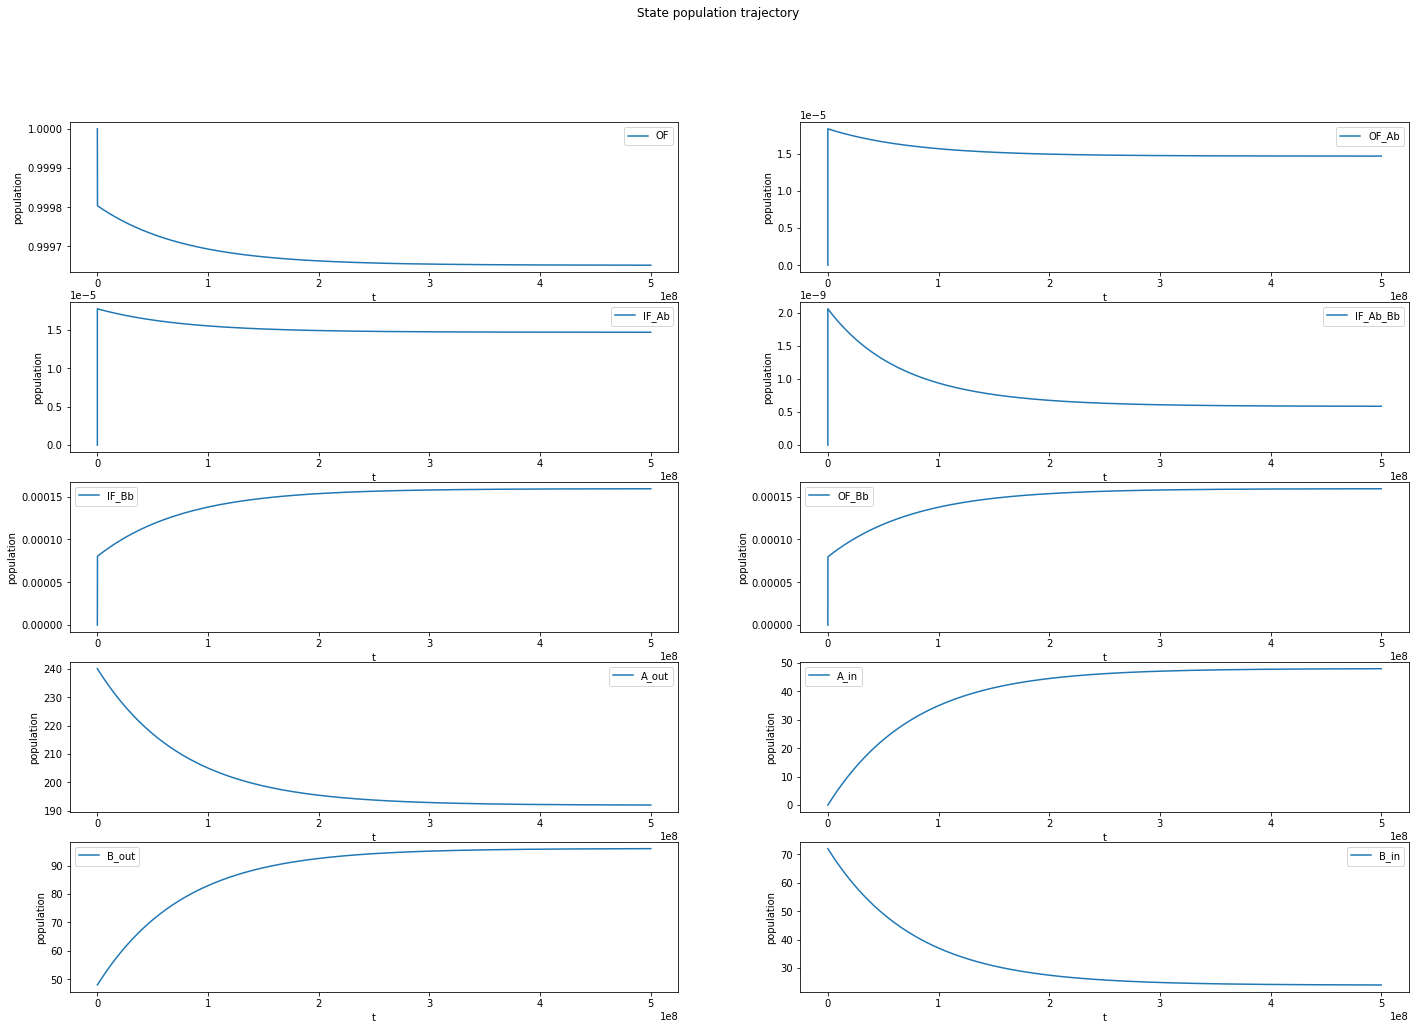

In [49]:
# graph population trajectories

fig, axs = plt.subplots(5, 2,figsize=(24,16))
plt.suptitle('State population trajectory')

axs[0, 0].plot(t, OF, label='OF')
axs[0, 0].legend()
axs[0, 1].plot(t, OF_Ab, label='OF_Ab')
axs[0, 1].legend()
axs[1, 0].plot(t, IF_Ab, label='IF_Ab')
axs[1, 0].legend()
axs[1, 1].plot(t, IF_Ab_Bb, label='IF_Ab_Bb')
axs[1, 1].legend()
axs[2, 0].plot(t, IF_Bb, label='IF_Bb')
axs[2, 0].legend()
axs[2, 1].plot(t, OF_Bb, label='OF_Bb')
axs[2, 1].legend()


axs[3, 0].plot(t, a_out, label='A_out')
axs[3, 0].legend()
axs[3, 1].plot(t, a_in, label='A_in')
axs[3, 1].legend()
axs[4, 0].plot(t, b_out, label='B_out')
axs[4, 0].legend()
axs[4, 1].plot(t, b_in, label='B_in')
axs[4, 1].legend()

# NESS
# axs[3, 0].axhline(a_out, label='A_out')
# axs[3, 0].legend()
# axs[3, 1].axhline(a_in, label='A_in')
# axs[3, 1].legend()
# axs[4, 0].axhline(b_out, label='B_out')
# axs[4, 0].legend()
# axs[4, 1].axhline(b_in, label='B_in')
# axs[4, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='population')

7.39626749082789e-09
8.843670274667417e-10
8.871244506703909e-10
8.876265254455276e-10
8.843339164795773e-10
4.703682642936968e-06
[5.52000000e-03 2.47671365e-06 2.47661443e-06 ... 1.00540696e-08
 1.00547275e-08 1.00553855e-08]


[Text(0.5, 0, 't'), Text(0, 0.5, 'flux ')]

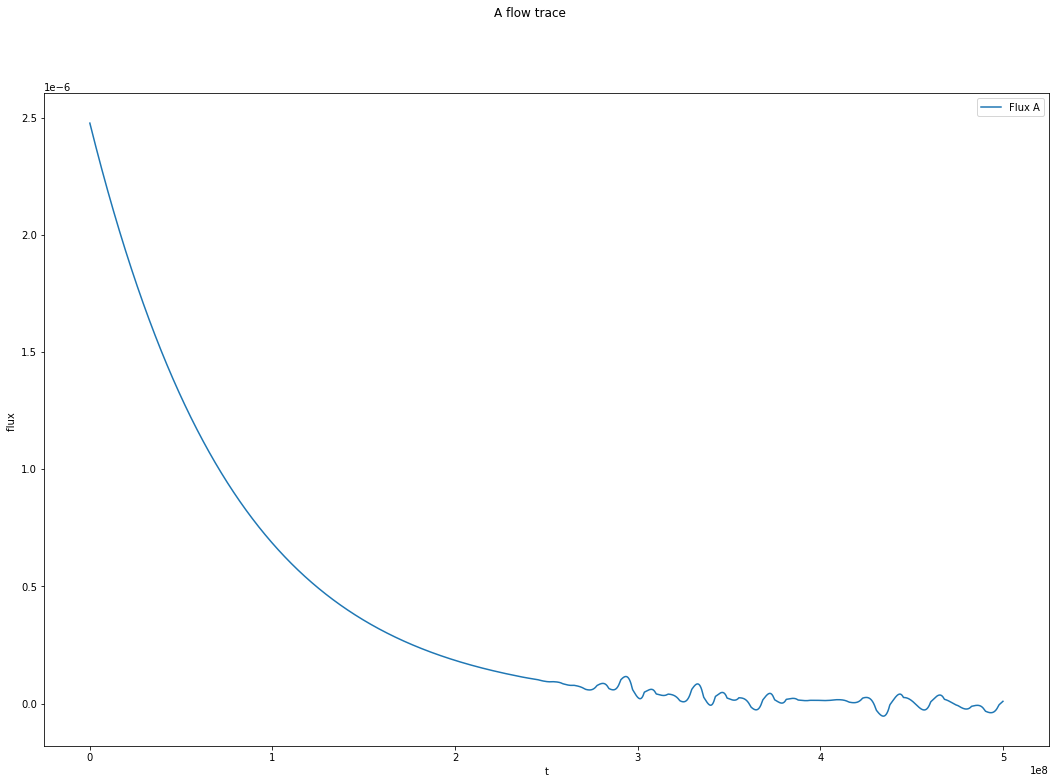

In [51]:
j_12 = OF*a_out*k_a_on
j_21 = OF_Ab*k_a_off
j1 = j_12 - j_21


j_23 = OF_Ab*k_conf
j_32 = IF_Ab*k_conf
j2 = j_23 - j_32

j_34 = IF_Ab*b_in*k_b_on
j_43 = IF_Ab_Bb*k_b_off
j3 = j_34 - j_43

j_45 = IF_Ab_Bb*k_a_off
j_54 = IF_Bb*a_in*k_a_on
j4 = j_45 - j_54

j_56 = IF_Bb*k_conf
j_65 = OF_Bb*k_conf
j5 = j_56 - j_65

j_61 = OF_Bb*k_b_off
j_16 = OF*b_out*k_b_on
j6 = j_61 - j_16

print(j1[-1])
print(j2[-1])
print(j3[-1])
print(j4[-1])
print(j5[-1])
print(j6[-1])

j_A_m1 = j1 + j2 + j3 + j4
print(j_A_m1)


fig, axs = plt.subplots(1, 1,figsize=(18,12))
plt.suptitle('A flow trace')

axs.plot(t[1:], j_A_m1[1:], label='Flux A')
axs.legend()
axs.set(xlabel='t', ylabel='flux ')

In [52]:
np.savetxt('J_A_1.csv', j_A_m1, delimiter=',')